<a href="https://colab.research.google.com/github/COGS118A/Group026-Sp22/blob/main/FinalProject_group026_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118A - Final Project

# Dog Breed Classification Based on Images Using SVM and Neural Networks

## Group members

- Dylan Nelson (DN)
- Mengyu Zhang (MY)
- Shengjie Mao (SJ)
- Yufei Deng (YD)

# Abstract 

This project is intended to use machine learning algorithms and computer vision to classify images of dogs according to their breeds. The dataset we used is adapted from the Stanford Dogs Dataset, which has a total of 20,580 individual dog images of 120 breed categories. Due to great computational challenge, we decided to use 10 classes consisting of 1735 images for our project. Our baseline model, a Support Vector Machine (SVM) with RBF kernel, achieved __37%__ accuracy. We then compared it to several architectures of Convolutional Neural Networks (CNN) for the fine-grained image classification task. Specifically, we used . We also appied image augmentation methods (e.g., horizontal flips, rotation) to enlarge our training set and prevent the CNN models from overfitting. Our best results are achieved with ResNet18 and it predicts dog breeds with an overall __82%__ accuracy. Lastly, we applied a data visualization tool called TSNE to map the classification results onto a 2D plane, which helps visualize the separability of individual dog breeds.

# Background

Hunting continues to make many animal species extinct, and the governments are unable to do much except introducing some laws and conducting regular surveys. But conducting a survey is not an easy task, especially without the help of technology[1].

Camera trap could help us with this, camera Trap is a camera that is automatically triggered bya change in some activity in its vicinity , like presence of an animal[2].

In order for the camera trap to match the image with the animal in the wild, we would have to train the models with the animals pictures. We could start with the animal that we are most familiar with: dogs. With the results we get from analyzing the data of dogs, we might be able to find the most efficient way to categorize the images of other animals. Camera trap imaging (automatic photography of animal species in the wild) is becoming the gold standard in biodiversity conservation efforts. It allows for accurately monitoring large swaths of land at an unprecedented scale[3].

Instead of sending people to the wild and do massive work, we can just train our model with existing pictures of the animals we want to capture and put cameras out there, we will be able to know the time, location and what kind of animals passed through. Also, this method could also help us in other way, “Cameras Designed To Find Rare Animals Could Catch Poachers Instead”[4].

# Problem Statement

Classifying dog breeds form images is exceptionaly challenging. It is a fine-grain classification task, characterized by the relative small differences in teh features and overall structures of individual dogs. Another challenge posed by this task is that there is small inter-group but large intra-group variations in the dog images; namely, some that belong to differnt breeds very much resemble each other (e.g. miniature poodles and toy poodles), while some that belong to the same class differ in shape, color, size, aand even lighting conditions where the photographs were taken, making the task extremely difficult. 

We therefore propose to implement and compare models that can tackle these challenges and correctly predict dog breeds from images, using individual pixel values (i.e., color and luminance) as features. Specifically, we used basic ML classification algorithms such as SVM and a deep learning/neural network approach for the classification task, and used accuracy as an evaluate metrics. 

Our project could be readily applied in many ways: field research, live cameras, search engine classification, etc. Our background research proved relative few models had promising results. We would like to compare our results to the preceeding ones, explore the problems we face along the way, and either improve them, or at strengthen our understanding of the limitations of different ML methods.



# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

---

## Dataset: 
Stanford Dogs Dataset: http://vision.stanford.edu/aditya86/ImageNetDogs/

- The dataset contains `20,580` images of `120` dog breeds, as well as annotations (e.g., bounding boxes of the dog target) for each image which we applied for preprocessing the images. 

### Dataset Stats
Total Pics: 20,580  
Total Species: 120

Average # pics: 	 171.5  
Minimum # pics: 	 148  
Maximum # pics: 	 252  

### Image Stats 
Mean img Height: 	 385.861  
Mean img Width: 	 442.532  

Med img Height: 	 375.0  
Med img Width: 		 500.0  


![output.png](output.png)
*There are no low outliers (too little info), only breeds with a relatively large amount of pics*

![output2.png](output2.png)
*even the lowest 50 breeds have a range of 8 images, little to no underrepresentation*

## Special Handling/ Transformation of Data

We decided to select only the following 10 dog breeds for our project: 
- Japanese_spaniel
- Afghan_hound
- Pekinese
- Tzu
- Rhodesian_ridgeback
- Chihuahua
- toy_terrier
- Maltese_dog
- papillon
- Blenheim_spaniel

The above 10 classes consist of a total of __1919__ images. As compared to the quantity of 20k images of the original dataset, using this subset of data will significantly reduce our computational load, enabling us to have more time fine-tuning our hyperparameters and try out multiple models.

### Image cropping

We noticed that most images contain a variety of background noises, ranging from natural terrains to objects like chairs, people, and other dogs. To avoid these from confounding our classification results, we used the bounding box information provided by the Stanford dataset to chop out the target dogs from the images.


![dog-image-pre.png](/image/dog-image-pre.png)

![dog-image-pre.png](/image/dog-image-pre.png)


### Train-test split
We used a 80-20 ratio to split our data into a train set of size __1541__ and a test set of size __378__. 

# Proposed Solution

We will be using SVM and CNN and CNN with pre-trained resnet18. As we have learned in the class, SVM is a type of algorithm that is useful when dealing with a dataset that has more features than the training data.  Since CNN are good at image processing, we expect to have a higher score with CNN and CNN with pre-trained resnet18 than the SVM. For most of the images which have two classes, CNN with pre-trained resnet18 could do 96% accuracy so we expect the CNN to have over 80% of accuracy on our 10 classes images. We divide our images into 90% of the training set and 10% of the test set, train the SVM model, CNN and CNN with pre-trained resnet18 model with those training data and test it with the test set. The best accuracy of each model will be compared and we expect the CNN with pre-trained resnet18 to have the highest accuracy.

# CNN
Convolutional Neural Nets have seen success in handeling a variety of complex tasks such as image classification and object detection. We imported the Pytorch library for CNN implementation:
- `import torch`
- `import torch.nn as nn`
- `import torchvision.transforms as transforms`
- `from torch.utils.data import DataLoader, Dataset`

### Image augmentation 
Before feeding raw images into the neural network, we performed data augmentation using `torchvision.transforms` to creat a larger training set, which can prevent the neural network from overfitting. Specifically, we used two transformation techniques: rondom horizontal flipping (`transforms.RandomHorizontalFlip()`) and 20-degree rotation (`transforms.RandomRotation(20)`). Finally, the image arrays were normalized with regard to array means and standard deviations (`transforms.Normalize(mean=train_mean, std=train_std)`).

### Defining the model
The architeture of the CNN model is shown below (Figure 2), which is adopted from a CNN homework material on github.<a name="lhy"></a>[<sup>[3]</sup>](#lhynote) It is a relatively simple ~13-layer neural network model. The model is built first with several blocks, each consists of an initial 3x3 convolutional layer along with batch normalization, a ReLU activation function, and a downsampling 2x2 max pooling layer. Upon finishing the basic blocks, we defined several fully connected layers to first project the outputs to a feature vector of size 1024, which is then gradually reduced to size 10, since we have 10 classes in our dataset.


| Layer   |  Filter size |  Output size |
|---|---|---|
| Input  | NA | 3x128x128  |
| 2D Convolution  |  (3, 3) |  64 x 128 x 128 | 
| Max Pooling 2D  |  (2, 2) |  64 x 64 x 64   | 
| 2D Convolution  |  (3, 3) |  128 x 64 x 64  | 
| Max Pooling 2D  |  (2, 2) |  128 x 32 x 32  |
| 2D Convolution  |  (3, 3) |  256 x 32 x 32  | 
| Max Pooling 2D  |  (2, 2) |  256 x 16 x 16  |
| 2D Convolution  |  (3, 3) |  512 x 16 x 16  | 
| Max Pooling 2D  |  (2, 2) |  512 x 8 x 8    |
| 2D Convolution  |  (3, 3) |  512 x 8 x 8    | 
| Max Pooling 2D  |  (2, 2) |  512 x 4 x 4    |
| Fully Connected (FC)  | NA  | 1024 |
| FC  | NA  | 512 |
| FC (Output)  | NA  | 10 |

> Figure 2. The architecture construction of our self-definied CNN model.



### Training the model

We further applied a 90-10 train-validation split on the training data. We incorporated an evaluation step into the course of model training, which can help give us a sense of the model's performance and whether or not it is overfitting. 

Next, we trained our model using a batch size of 15 over 40 epochs. We started by initializing an optimizer with a very low learning rate of 0.001 (`torch.optim.Adam(model.parameters(), lr=0.001)`). We then defined a loss function usign cross entropy loss as criterion (`nn.CrossEntropyLoss()`).

We recorded both the accuracy and loss of the training and validation sets in each epoch.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

---
(...to be filled in)

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.


Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

---

## Baseline: SVM

We believed that the SVM model is a proper baseline for us to start with. After doing the GridSearch, we found out that with the "rbf" kernel and a C equals to 10, the model's accuracy score performs the best. Rather than analyzing the raw data, we preprocessed the images with the Histogram of Oriented Gradient (HOG) to extract the important features [4]. <br>
The best accuracy score we obtained was 37%, which is not that good for the model to predict the future data. We assumed that the complexity of the images and the tiny features of the dog characteristics. The images were not purely black or white backgrounds, which made it difficult for the computer to extract essential breed features. <br>
Considering the long processing time and the relatively low accuracy score of the final result, we believed that other models, like CNN, can perform better estimations. <br>
(Link to  full code: https://github.com/COGS118A/Group026-Sp22/blob/main/SVM_with_HOG.ipynb)


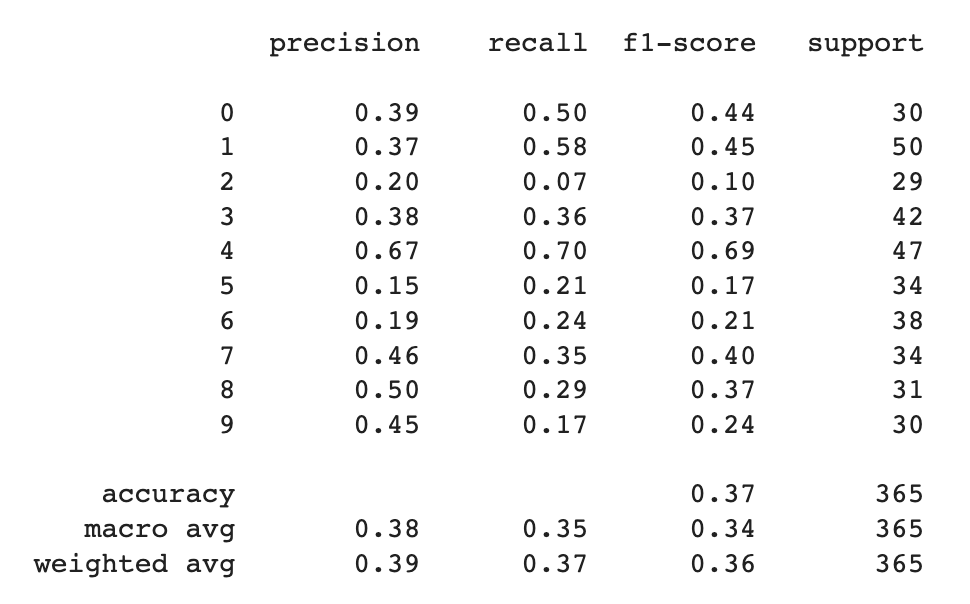

## CNN
Using the aforesaid construction of CNN layers and a batch size of 15, learning rate of 0.001, over 40 epochs, our model achieved __60.3%__ accuracy on the testing set. Link to full codes for CNN implementation: https://github.com/COGS118A/Group026-Sp22/blob/main/image%20processing.ipynb. The learning curves and loss over epochs are as shown below.


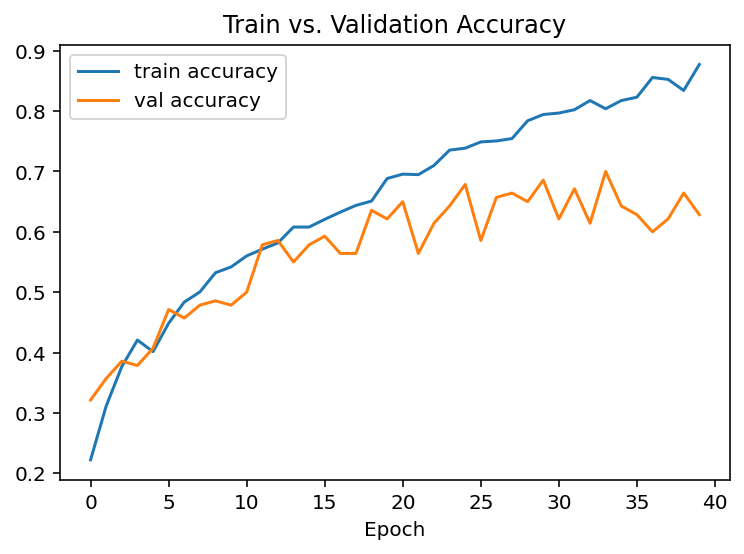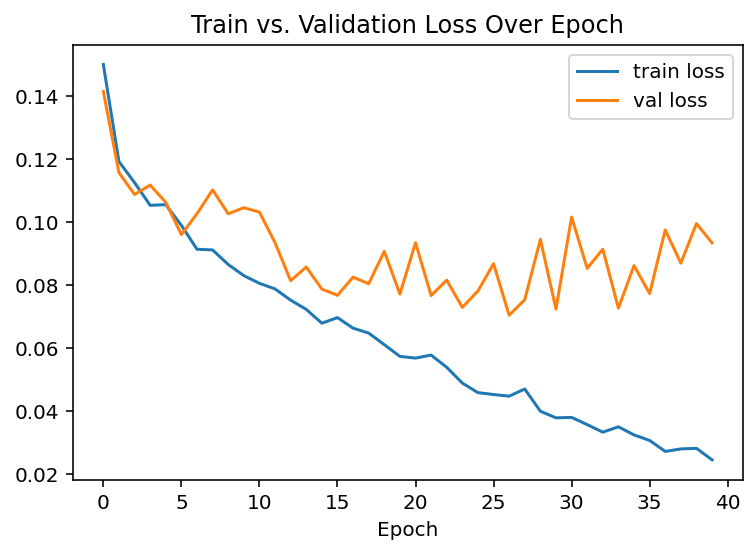

The model produced the following test accuracies by breed: 
>- Breed Japanese_spaniel has 77.8% accuracy
- Breed Afghan_hound has 59.6% accuracy
- Breed Pekinese has 17.2% accuracy
- Breed Tzu has 54.8% accuracy
- Breed Rhodesian_ridgeback has 79.4% accuracy
- Breed Chihuahua has 26.7% accuracy
- Breed toy_terrier has 55.9% accuracy
- Breed Maltese_dog has 80.0% accuracy
- Breed papillon has 53.8% accuracy
- Breed Blenheim_spaniel has 78.4% accuracy


Below used a heat map to visualize the confusion matrix that shows the prediction accuracies by dog breed.


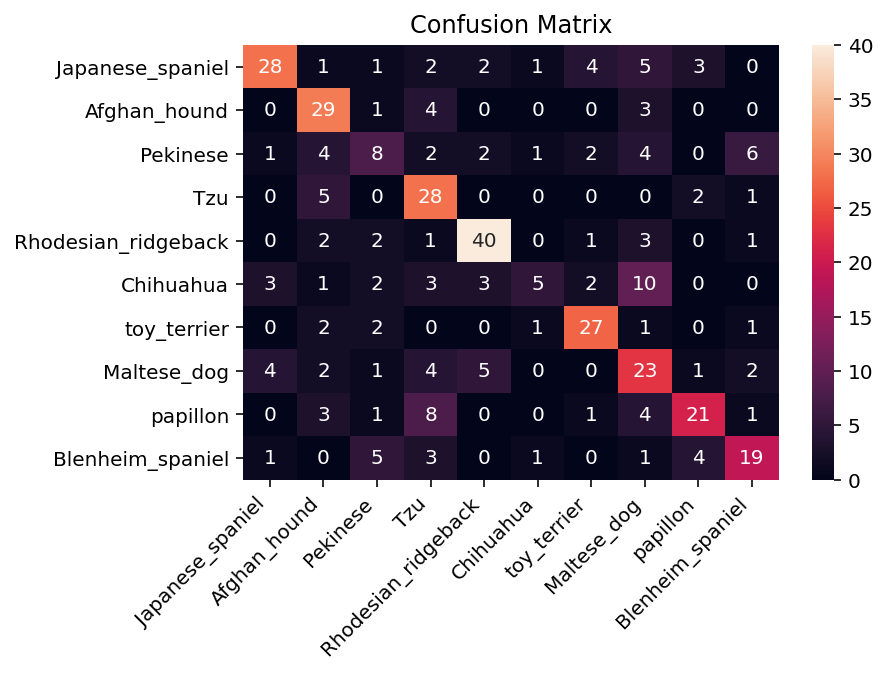

## Pretrained CNN (ResNet18)


CNN is a type of deep learning model for processing data that has a grid pattern, such as images, which is inspired by the organization of the animal visual cortex and designed to automatically and adaptively learn spatial hierarchies of features, from low- to high-level patterns. https://insightsimaging.springeropen.com/articles/10.1007/s13244-018-0639-9

Since CNN works great on image classification, we decide to use CNN on our datasets and see how that works. Our first attempt was on the lower layer of CNN which gives us better results than what we get from SVM, but it is still not as good as we expect. We then apply a deep layer neural network, pre-trained Resnet18, to deal with our data. 
(link to code: https://github.com/COGS118A/Group026-Sp22/blob/main/CNN_resnet18.ipynb
)
Because we have a large dataset of 120 classes and a total of 20580 pictures, the expected run time for all the images to be processed will be too long. Therefore we choose 10 of the total 120 classes and they are: 'Japanese_spaniel', 'Afghan_hound', 'Pekinese', 'Tzu', 'Rhodesian_ridgeback', 'Chihuahua', 'toy_terrier', 'Maltese_dog', 'papillon', 'Blenheim_spaniel'. 

The best result we get from CNN resnet18 is around 0.82 which is around what we expect to have. 
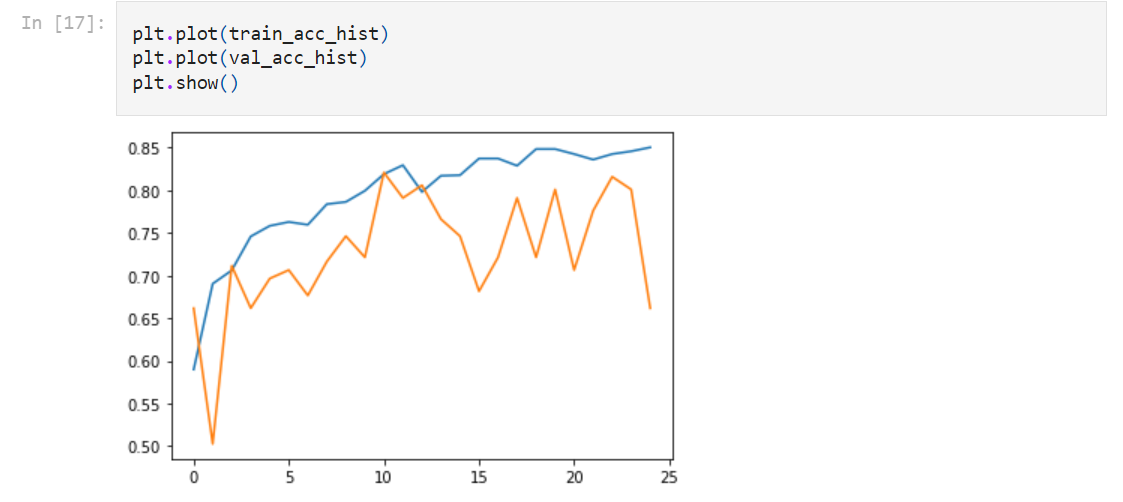

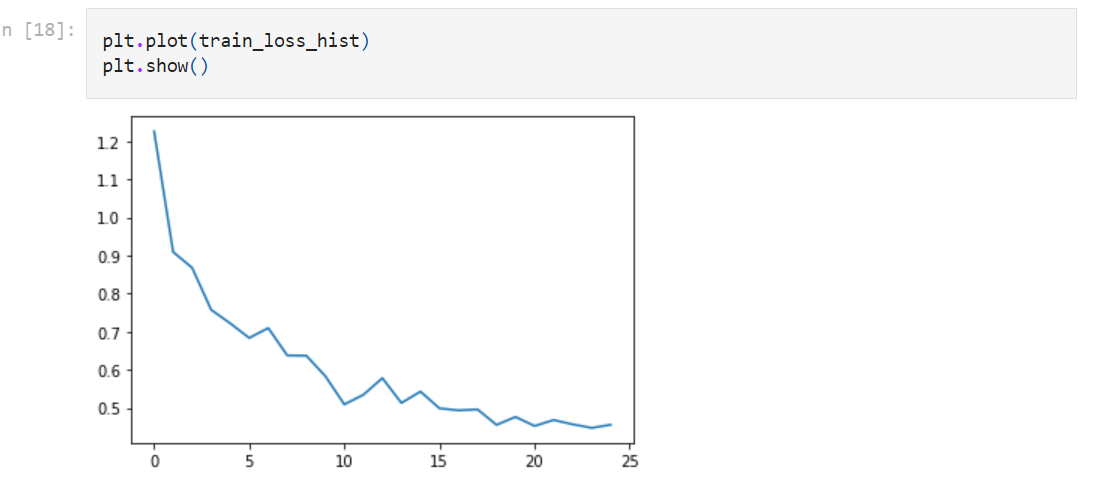

Although the result we get are around what we expected to have, but there are somethging that we could improve on. The Pre-trained resnet18 gives us a good result, but we could further improve the model to resnet50 or use other models like VGG to see if those models could give us better results. Also, the limited time we have caused us to reduce the number of classes we used on the model, the result we get from those 10 classes might not be able to reflect the true performance of the model if the 120 classes are all used. 


# Discussion

### Interpreting the result

We tried the different models with various kinds of algorithms to understand the way that computer analyzes the image-like inputs. Some models, like the SVM, might work well with binary datasets and perform poorly on the images and more complex inputs. Other deep learning models like the CNN model provides us with much higher accuracy and by studying the previously pretrained models, we understood some new methods of improving the model's accuracy. <br>
The different models can perform radically different on the same dataset so it is always worthy for us to try different models and examine the various combinations of hyperparameters to find out the best model for a new dataset. <br>
Based on our analysis, we believe that the pretrained CNN models, like the ResNet18 works best with the dog breeding images.

### Limitations

1. Limited amount of training data: In order to run our model mor effeiciently, we only randomly chosed 10 breeding classes for analyzing different models. Lacking the large amount of input training datasets might result in the variance in accuracy scores. 
2. Other  preprocessing method: for instance, we used the HOG method for preprocessing the SVM model's input. The method did not work perfectly with our raw images and the extractions of features affected our final accuracy scores. Other preprocessing methods might be able to convert our raw images to more feature-prominent ones.
3. Possible advanced model: We only used the SVM, CNN, and the pretrained CNN models like the ResNet18. We assumed that using more complexed or well-developed models can help us to increase the accuracy score.

### Ethics & Privacy

__Data collection__: We retrieved the dataset from Stanford dataset, which means that we did not have direct access to the participants. Since the library is a public platform, we believed that we are allowed to use the data for our analysis and we did not hold bias toward the contents of the data; <br>
__Data storage__: We can assume that the data is safe and will not be exposed to others for illegal use since we only processed and analyzed the data using Google drive and Github associated with our UCSD email addresses. We also deleted the data from our local computer once we finish the project and uploaded to the course github; <br>
__Analysis__: We used visualizations along with the codes and descriptions in our analysis so that people can understand our analysis clearly. We made well documented analysis to make it reproducible for later use;<br>
__Modeling__: We did not rely on discriminated data. And since we evaluated the dog breed datasets, we did not have ethical concerns about race, genders, or other aspects; <br>
__Deployment__: We will not allow unintended use of the model by tracking the activities on our Github homepage in the future. We believed that the model can help us have better understanding toward the breeds of the dog and our model may help other people to develop new technology for us to take more care of the dogs.

### Conclusion

Camera Trap helps us capture the animals’ location, when did they pass through the area and what kind of animals are they. With the help of Camera Trap, we could get information about wild animals without sending so many people out. Also, the information we get could help us protect the animals from hunting. In our project, we want to know with the machine learning algorithms, how accurate we could get in classifying the different animals. Our CNN with pre-trained resnet18 gives us over 80% of accuracy which might not be good enough for actually applying it to the wild, but it is a good start. With more models tried on classifying the animals, the accuracy should be able to reach over 95% which makes the application of such cameras possible. With those camera traps, the hunting will be greatly reduced and we will be able to know more about the wild anmials..

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem<br>
<a name="sotanote"></a>4.[^](#sota): HOG model https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html?highlight=hog

<a name="lhynote"></a>[<sup>[3]</sup>](#lhy): Li, H(2020). Li Hongyi 2020 Deep Learning Course Homework Material. https://github.com/Iallen520/lhy_DL_Hw/blob/master/hw3_CNN.ipynb

